# Final Homework

## Two weeks delay $\implies$ to send before Sunday, the 21st of January... 2024

## PageRank Algorithm

**PageRank** was the first ``Google'' algorithm ; *id est* a search engine to efficiently index the web.

The algorithm was proposed by Page & Brin in the paper : "[The anatomy of a large-scale hypertextual Web search engine](https://snap.stanford.edu/class/cs224w-readings/Brin98Anatomy.pdf)" (1998).

The idea is very simple. 
The web can be seen as a ***directed*** graph $G(V,E)$.

The vertices $v \in V$ being the web-pages. There is an (directed) edge $e = (v , v'), \ v,v' \in V$ if the page $v$ links to ($=$ there is a web-link on the page) $v'$.

The PageRank algorithm is based on an ideal random web-surfer who, when reaching a page, goes to the next page by clicking on a link. The surfer has equal probability of clicking any link on the page. 
In addition, the surfer may occasionally choose to type in a random URL instead of following the links on a page. 

This random walk produces an **Centrality Indice** function $f(v)$ on the web-pages ($=$ the nodes $v \in V$) used to rank the results of a web-search.

This indice is given by :

$$f(v) = \text{The probability $\pi_v$ for the web-surfer to be on the page $v$.} $$


(The results of a Google-search were sorted from the highest value of $f(v)$ to the lowest.)


### 1/ Preliminaries

Let $G$ be the following directed graph :


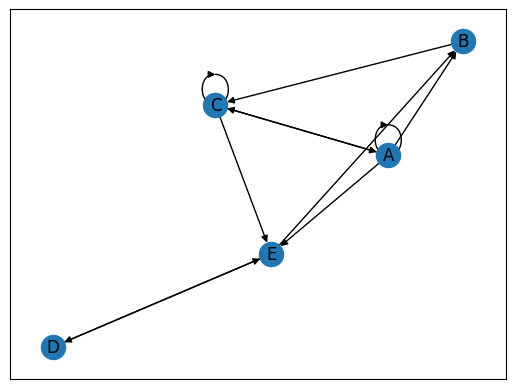

In [1]:
import numpy as np
import networkx as nx



G = nx.DiGraph()

G.add_edges_from([('A','B'), ('D','E'), ('A','C'), ('A', 'A'), ('A', 'E'), ('E', 'D'), ('B','C'), ('C', 'C'), ('E', 'B'), ('C', 'E'), ('C', 'A')])

nx.draw_networkx(G, with_labels=True)


<u>***Question***</u> : Write (in Python) the adjacency matrix $A$ of this graph $G$ ? Is $A$ symmetric ? 

<u>***Your answer***</u> : 
$A$ has no reason to be symmetric because the graph $G$ is directed.

In [2]:
### YOUR PYTHON ANSWER

n = G.number_of_nodes()

A = np.array([[1., 1., 1., 0., 1.], [0., 0., 1., 0., 0.], [1., 0., 1., 0., 1.], [0., 0., 0., 0., 1.], [0., 1., 0., 1., 0.]])

A

array([[1., 1., 1., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 1., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.]])

### 2/ First simple random walk

Let us simply walk randomly (and uniformly according to the different links on a web-page).

That is, at each step, if the walker is in node $v$, he chooses (uniformly) a node $v'$ such that $A_{v, v'} = 1$ and jumps from $v$ to $v'$.

To compute the transition matrix $P$ of this random walk, we need the adjacency matrix $A$ and the (diagonal matrix, or vector... as you want)  $D$ of degrees...

<u>***Question***</u> : ... but is $D$ the out-degrees matrix or the in-degrees one ?.. Compute $D$ (in python). What is the condition on $D$ in order to compute $P$ ? Is it satisfied ? Finally, compute $P$.

<u>***Your answer***</u> : $D$ is the out-degree matrix (we look at the out-links, not the in-ones). So $D_{i,i}$ is the sum over the $i$th row :
$$ D_{i,i} = \sum_j A_{i,j}.$$


To random walk, we must be unblocked on a page (there is at least one link) :
$$\forall i, \ \ \  D_{i,i} > 0 $$

Then :

$$ P = D^{-1} A .$$


In [3]:
### YOUR PYTHON ANSWER

ones = np.ones((n,))

D = np.diag(A @ ones)

P = np.linalg.inv(D) @ A # unoptimized at all : inverse is expensive... we should do : inverting element-wisen the vector  = np.diag(np.invert( A @ ones))

P

array([[0.25      , 0.25      , 0.25      , 0.        , 0.25      ],
       [0.        , 0.        , 1.        , 0.        , 0.        ],
       [0.33333333, 0.        , 0.33333333, 0.        , 0.33333333],
       [0.        , 0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.5       , 0.        , 0.5       , 0.        ]])

### 3/ The ergodic theorem

We now want to apply the ergodic theorem. 

<u>***Question***</u> : Recall the hypothesis. Why do they apply ? What can you say (existence, uniqueness, ...) about an invariant measure $\pi$ ?

<u>***Your answer***</u> : The Markov chain is finite ; it is thus sufficient to show that it is **irreducible**. That is, for each $v,v'$, there is a path from $v$ to $v'$. That is the case ! And that the Markov chain is **a-periodic**. The presence of a loop is a sufficient condition for that.

Also, there is an **unique** probability vector $\pi$ invariant by $P$. That is :
$$ \pi P = \pi .$$

<u>***Question***</u> : Compute (with linear algebra) $\pi$.

**TIPS** : to avoid errors on float approximation, use `np.round(λ, 5)`instead of `λ`...
Because the ergodic theorem ensures that $\pi$ is real and not complex, use the instruction `π = np.real(π)`.

In [4]:
#### YOUR PYTHON ANSWER

# π is the (unique) eigen-vector (l1-normalised) associated to the eigen-value 1 of Transpose(P)

eigenValues, eigenVectors = np.linalg.eig(P.T)

for i,λ in enumerate(list(eigenValues)) :
    if np.round(λ, 5) == 1 :
        π = eigenVectors[:,i] # the eigen-vector associatied to λ = 1


π = np.real(π)
π = π/np.sum(π) # We l1-normalise

π

array([0.13333333, 0.16666667, 0.3       , 0.13333333, 0.26666667])

Suppose that, at one step, the random walker is on the node $B$, denote $T$ the random variable of the time to return in $B$.

<u>***Question***</u> : What is the value of 
$ \mathbb E [T] $ ?

In [5]:
### YOUR PYTHON ANSWER

# By the ergodic theorem E[T] = 1/(π_B)

E = 1/π[1]

print('The expected value of T is ', E)

The expected value of T is  5.999999999999999


### 4/ The PageRank algorithm

The random walker of the PageRank algorithm has a behaviour a little bit different -- and perhaps more realistic.

Let $\alpha \in (0 ; 1)$ (typically $\alpha = 0.85$).


At each step, the random walker :

--- With probability $\alpha$ do the same as previously : he clicks randomly on a link ofthe page he is on.

--- With probability $(1 - \alpha)$, he leaves his current page and type a new site in the URL. That is : he jumps from $v$ uniformly to a new page $v' \in V$ (with probability $\frac1n$).


<u>***Question***</u> : Write the new formula of the transition matrix $P$. Does the ergodic theorem always apply ? Then compute $P$ in Python.



<u>***Your answer***</u> : 

Now we have :

$$ P = \alpha D^{-1} A + (1- \alpha) \frac1n \mathbb 1_ n $$

Where $\mathbb 1_n$ is the $n \times n$ matrix with $1$ everywhere.

The graph is now complete ; obviously, the ergodic theorem applies.

In [6]:
### YOUR PYTHON ANSWER

α = 0.85

P = α * (np.linalg.inv(D) @ A) + (1-α)/n * np.ones((n,n))

P

array([[0.2425    , 0.2425    , 0.2425    , 0.03      , 0.2425    ],
       [0.03      , 0.03      , 0.88      , 0.03      , 0.03      ],
       [0.31333333, 0.03      , 0.31333333, 0.03      , 0.31333333],
       [0.03      , 0.03      , 0.03      , 0.03      , 0.88      ],
       [0.03      , 0.455     , 0.03      , 0.455     , 0.03      ]])

### 5/ The efficient way to compute $\pi$, the invariant probability vector

Even at the time (1998) of the article presenting PageRank, the web was already made of tens of millions, making impossible the diagonalisation of the matrix $P$. 

(In fact, even the matricial $n \times n$ representation of the web is too large ; we should represent it by adjacency neigbouring-list or sparse matrices... Whatever... let us continue with the matrices, simpler to manipulate !..)

<u>***Question***</u> : Using the ergodic theorem, propose an algorithm to approximate $\pi$.

Code it in Python !

<u>***Your answer***</u> : If we initialise with whatever probability vector $\mu$, by ergodic theorem we have that : $$ \mu P^k \to \pi \ \ \ \ \text{ when $k \to \infty$}$$

Where $\pi$ is the (unique) probability vector invariant by $P$.

In [7]:
k = 500 # number of iterations 

μ = np.ones((1,n))/n
π = μ @ P
for _ in range(k) :
    π = π @ P

π

array([[0.14111496, 0.1708462 , 0.28633423, 0.14085927, 0.26084534]])

<u>***Question***</u> : What would be the first suggestion of Google. (There was a time when there was a 'lucky me' button.)

<u>***Your answer***</u> : 
$$ C = argmax \ \ \pi .$$

### This is "*The end*" of Statistical Analysis of Networks 😢 ... Have a nice continuation !..